In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# Create a sample dataset
years = list(range(2018, 2026))

# Simulate UK sales: number of units sold per year (hyper‑limited production)
np.random.seed(42)
uk_units_sold = np.random.poisson(lam=3, size=len(years))  # small numbers typical for hypercars

# Example average price per car in £ million
avg_price_million = np.linspace(1.8, 2.5, len(years))

# Compute estimated sales revenue
sales_revenue_million = uk_units_sold * avg_price_million

# Simulate profit margin % (gross margin)
profit_margin_pct = np.random.normal(loc=30, scale=5, size=len(years))
profit_margin_pct = np.clip(profit_margin_pct, 20, 50) # realistic premium margins

# Buyer demographic proxies (average annual income band, UK regions)
income_band = np.random.choice(['£300k-£500k','£500k-£1M','£1M+'], len(years))
regions = np.random.choice(['London','South East','Scotland','North West','Other'], len(years))

# Create DataFrame
koenigsegg_uk_df = pd.DataFrame({
    'Year': years,
    'Units_Sold': uk_units_sold,
    'Avg_Price_Million_GBP': avg_price_million,
    'Sales_Revenue_Million_GBP': sales_revenue_million,
    'Profit_Margin_Pct': profit_margin_pct,
    'Buyer_Income_Band': income_band,
    'Buyer_Region': regions
})

koenigsegg_uk_df

,Year,Units_Sold,Avg_Price_Million_GBP,Sales_Revenue_Million_GBP,Profit_Margin_Pct,Buyer_Income_Band,Buyer_Region
0,2018,4,1.8,7.2,30.611096,£300k-£500k,South East
1,2019,1,1.9,1.9,27.422822,£1M+,North West
2,2020,3,2.0,6.0,26.998731,£1M+,Other
3,2021,3,2.1,6.3,34.737199,£500k-£1M,South East
4,2022,2,2.2,4.4,31.455170,£300k-£500k,South East
5,2023,3,2.3,6.9,26.822201,£500k-£1M,North West
6,2024,2,2.4,4.8,24.892239,£500k-£1M,South East
7,2025,3,2.5,7.5,29.191223,£500k-£1M,South East


In [3]:
koenigsegg_uk_df.describe()

,Year,Units_Sold,Avg_Price_Million_GBP,Sales_Revenue_Million_GBP,Profit_Margin_Pct
count,8.00000,8.000000,8.000000,8.000000,8.000000
mean,2021.50000,2.625000,2.150000,5.625000,29.016335
std,2.44949,0.916125,0.244949,1.862218,3.155097
min,2018.00000,1.000000,1.800000,1.900000,24.892239
25%,2019.75000,2.000000,1.975000,4.700000,26.954598
50%,2021.50000,3.000000,2.150000,6.150000,28.307022
75%,2023.25000,3.000000,2.325000,6.975000,30.822114
max,2025.00000,4.000000,2.500000,7.500000,34.737199


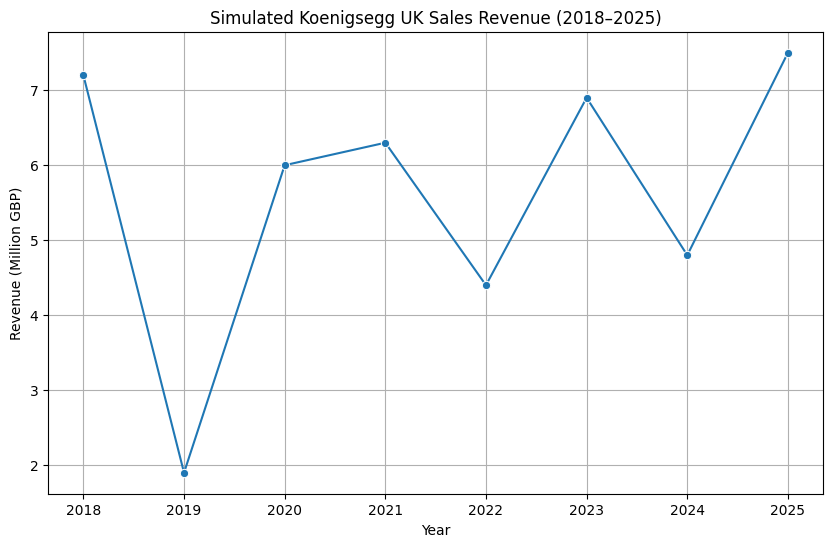

In [4]:
plt.figure(figsize=(10,6))
sns.lineplot(data=koenigsegg_uk_df, x='Year', y='Sales_Revenue_Million_GBP', marker='o')
plt.title('Simulated Koenigsegg UK Sales Revenue (2018–2025)')
plt.ylabel('Revenue (Million GBP)')
plt.grid(True)
plt.show()

/var/folders/88/w4w1n8l12kd_z42_6mrnndmw0000gn/T/ipykernel_86897/136674604.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=koenigsegg_uk_df, x='Year', y='Profit_Margin_Pct', palette="coolwarm")


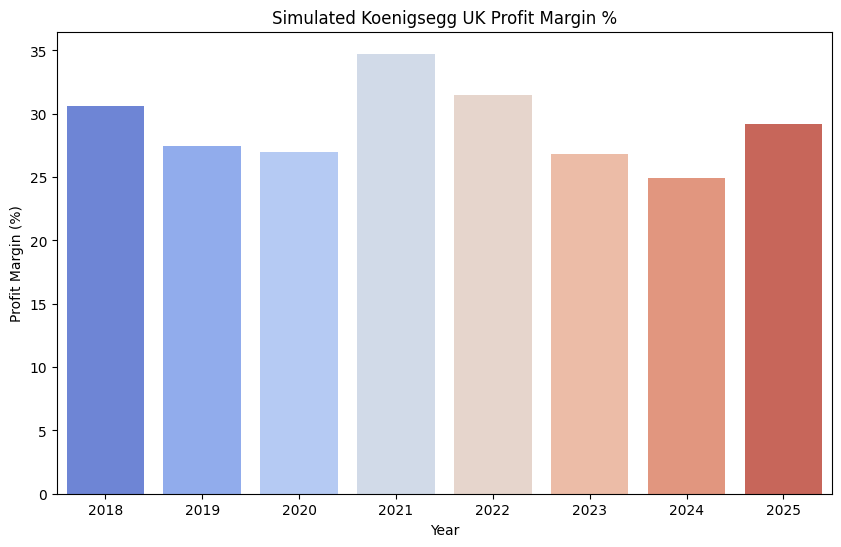

In [5]:
plt.figure(figsize=(10,6))
sns.barplot(data=koenigsegg_uk_df, x='Year', y='Profit_Margin_Pct', palette="coolwarm")
plt.title('Simulated Koenigsegg UK Profit Margin %')
plt.ylabel('Profit Margin (%)')
plt.show()

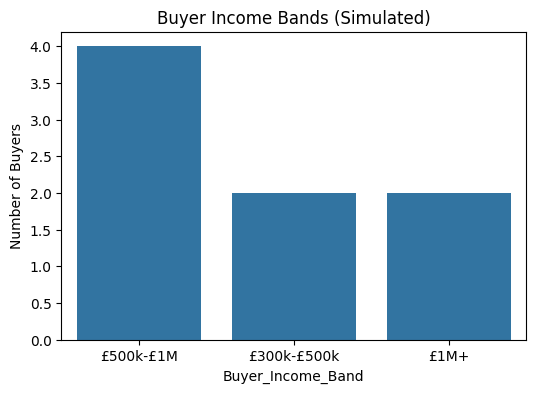

In [6]:
income_counts = koenigsegg_uk_df['Buyer_Income_Band'].value_counts()

plt.figure(figsize=(6,4))
sns.barplot(x=income_counts.index, y=income_counts.values)
plt.title('Buyer Income Bands (Simulated)')
plt.ylabel('Number of Buyers')
plt.show()

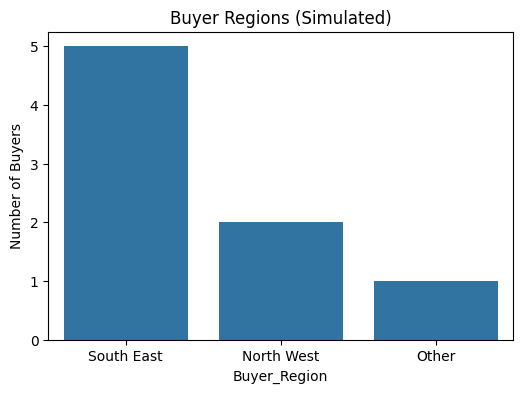

In [7]:
region_counts = koenigsegg_uk_df['Buyer_Region'].value_counts()

plt.figure(figsize=(6,4))
sns.barplot(x=region_counts.index, y=region_counts.values)
plt.title('Buyer Regions (Simulated)')
plt.ylabel('Number of Buyers')
plt.show()

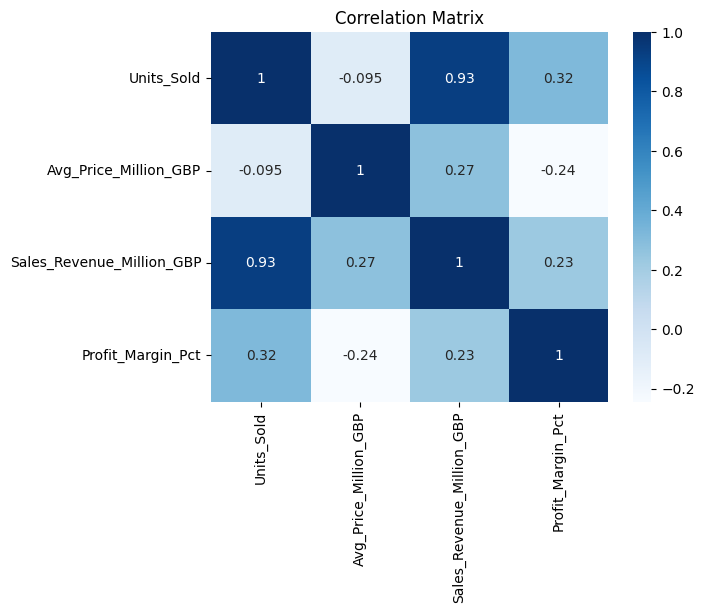

In [8]:
corr = koenigsegg_uk_df[['Units_Sold','Avg_Price_Million_GBP','Sales_Revenue_Million_GBP','Profit_Margin_Pct']].corr()
sns.heatmap(corr, annot=True, cmap='Blues')
plt.title('Correlation Matrix')
plt.show()